<a href="https://colab.research.google.com/github/Nidzoki/PMFST_IntroToDS_Examples_of_Good_Practice/blob/main/2/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# DATASET 1: TITANIC
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(titanic_url)

print(f"Titanic dataset učitan: {df_titanic.shape[0]} redova, {df_titanic.shape[1]} stupaca")

display(df_titanic.head())

# DATASET 2: REAL ESTATE
print("\n\n2. Učitavanje Real Estate dataseta...")
estate_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df_estate = pd.read_csv(estate_url, header=None,
                        names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                               'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

print(f"Real Estate dataset učitan: {df_estate.shape[0]} redova, {df_estate.shape[1]} stupaca")

display(df_estate.head())


# DATASET 3: CUSTOMER DATA

np.random.seed(42)
n_rows = 200

df_customers = pd.DataFrame({
    'customer_id': range(1, n_rows + 1),
    'name': [f'Customer_{i}' for i in range(1, n_rows + 1)],
    'email': [f'customer{i}@email.com' if np.random.rand() > 0.1 else np.nan
              for i in range(1, n_rows + 1)],
    'city': np.random.choice(['Zagreb', 'zagreb', 'ZAGREB', 'Split', 'split',
                              'Rijeka', 'Osijek', 'St', 'ZG', 'Čakovec', 'Čakovac'], n_rows),
    'registration_date': pd.date_range(start='2020-01-01', periods=n_rows, freq='D').astype(str),
    'age': np.random.randint(18, 80, n_rows),
    'purchase_amount': np.random.normal(1000, 300, n_rows),
    'visits': np.random.poisson(5, n_rows)
})


df_customers.loc[np.random.choice(df_customers.index, 20), 'age'] = np.nan
df_customers.loc[np.random.choice(df_customers.index, 15), 'purchase_amount'] = np.nan


df_customers.loc[np.random.choice(df_customers.index, 5), 'age'] = np.random.choice([150, 200, 5])
df_customers.loc[np.random.choice(df_customers.index, 5), 'purchase_amount'] = np.random.choice([50000, -1000, 100000])


df_customers = pd.concat([df_customers, df_customers.iloc[:10]], ignore_index=True)

df_customers.loc[np.random.choice(df_customers.index, 10), 'registration_date'] = '01/12/2020'

print(f"Customer dataset kreiran: {df_customers.shape[0]} redova, {df_customers.shape[1]} stupaca")


Titanic dataset učitan: 891 redova, 12 stupaca


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




2. Učitavanje Real Estate dataseta...
Real Estate dataset učitan: 506 redova, 14 stupaca


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Customer dataset kreiran: 210 redova, 8 stupaca


# Zadatak 1 - Titanic dataset

In [5]:
# TODO: Provjerite koliko nedostajućih vrijednosti ima u svakom stupcu

df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df_titanic_drop = df_titanic.copy()

# TODO: Izbrišite stupac 'Cabin' jer ima previše nedostajućih vrijednosti (77%)

df_titanic_drop.drop('Cabin', axis=1, inplace=True)

df_titanic_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
# TODO: Izbrišite sve redove gdje nedostaje 'Age'

df_titanic_drop.dropna(subset=['Age'], inplace=True)

df_titanic_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [37]:
print(f"\nOriginalni dataset: {df_titanic.shape[0]} redova")
print(f"Nakon brisanja: {df_titanic_drop.shape[0]} redova")
print(f"Izgubljeno redova: {df_titanic.shape[0] - df_titanic_drop.shape[0]}")


Originalni dataset: 891 redova
Nakon brisanja: 714 redova
Izgubljeno redova: 177


In [39]:
df_titanic_imputed = df_titanic.copy()

# TODO: Popunite nedostajuće vrijednosti u 'Age' s medijanom

df_titanic_imputed['Age'].fillna(df_titanic_imputed['Age'].median(), inplace=True)

df_titanic_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-3852501633.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_imputed['Age'].fillna(df_titanic_imputed['Age'].median(), inplace=True)


In [40]:
# TODO: Popunite nedostajuće vrijednosti u 'Embarked' s modom (najčešća vrijednost)

df_titanic_imputed['Embarked'].fillna(df_titanic_imputed['Embarked'].mode()[0], inplace=True)

df_titanic_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-1799338388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_imputed['Embarked'].fillna(df_titanic_imputed['Embarked'].mode()[0], inplace=True)


In [41]:

print(f"\n1. Originalni dataset: {df_titanic.shape}")
print(f"2. Nakon brisanja: {df_titanic_drop.shape}")
print(f"3. Nakon imputacije: {df_titanic_imputed.shape}")



1. Originalni dataset: (891, 12)
2. Nakon brisanja: (714, 11)
3. Nakon imputacije: (891, 12)


# Zadatak 2 - Customer data dataset

In [42]:
print(df_customers['registration_date'].dtype)

display(df_customers['registration_date'].head())

print(df_customers['registration_date'].unique()[:50])

object


,registration_date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04'
 '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09'
 '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13' '01/12/2020'
 '2020-02-15' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20']


In [46]:
# TODO: Parsirajte string u datetime objekt
df_customers['registration_date'] = pd.to_datetime(df_customers['registration_date'], errors='coerce')

print(f"\nTip nakon parsiranja: {df_customers['registration_date'].dtype}")
print(f"Broj NaT vrijednosti: {df_customers['registration_date'].isna().sum()}")


Tip nakon parsiranja: datetime64[ns]
Broj NaT vrijednosti: 10


In [49]:
# TODO: Ekstrahirajte dan u tjednu (0=ponedjeljak, 6=nedjelja)

df_customers['day_of_week'] = df_customers['registration_date'].dt.dayofweek

df_customers.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0


In [59]:
# TODO: Kreirajte boolean značajku - je li vikend?

df_customers['is_weekend'] = df_customers['day_of_week'] >= 5
df_customers.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0,False
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0,False
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0,False
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0,True
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0,True


In [70]:
from itertools import groupby
# TODO: Koliko registracija je bilo vikendom vs radnim danom? Hint - koristiti value_counts()

df_customers['is_weekend'].value_counts()

,count
is_weekend,
False,154
True,56


In [71]:
# TODO: Izračunajte prosječan iznos kupnje po danu u tjednu

df_customers['purchase_amount'].groupby(df_customers['day_of_week']).mean()

,purchase_amount
day_of_week,
0.0,2929.830964
1.0,932.983820
2.0,2726.662564
3.0,963.641687
4.0,2672.034731
5.0,1055.655460
6.0,979.436845


# Zadatak 3 - Customer data dataset

In [72]:
print(df_customers['city'].unique())
print(df_customers['city'].value_counts())

df_customers_clean = df_customers.copy()

['St' 'Split' 'Čakovac' 'Zagreb' 'Rijeka' 'ZAGREB' 'ZG' 'zagreb' 'split'
 'Osijek' 'Čakovec']
city
Zagreb     25
Čakovec    25
Split      22
split      22
Rijeka     22
ZAGREB     22
St         21
Osijek     17
zagreb     14
ZG         12
Čakovac     8
Name: count, dtype: int64


In [73]:
# TODO: Konvertirajte sve u mala slova

df_customers_clean['city'] = df_customers_clean['city'].str.lower()

print(df_customers_clean['city'].value_counts())

city
zagreb     61
split      44
čakovec    25
rijeka     22
st         21
osijek     17
zg         12
čakovac     8
Name: count, dtype: int64


In [74]:
# TODO: Uklonite razmake na početku i kraju

df_customers_clean['city'] = df_customers_clean['city'].str.strip()

print(df_customers_clean['city'].value_counts())

city
zagreb     61
split      44
čakovec    25
rijeka     22
st         21
osijek     17
zg         12
čakovac     8
Name: count, dtype: int64


In [77]:
# TODO: Definirajte mapiranje za poznate varijacije


city_mapping = {
    'zg': 'zagreb',
    'st': 'split',
    'čakovac': 'čakovec'
}


df_customers_clean['city'] = df_customers_clean['city'].replace(city_mapping)

In [78]:
# TODO: Primijenite mapiranje


print(df_customers_clean['city'].value_counts())

city
zagreb     73
split      65
čakovec    33
rijeka     22
osijek     17
Name: count, dtype: int64


In [79]:
!pip install fuzzywuzzy

In [80]:

def standardize_city(city, valid_cities, threshold=85):
    """
    Pronalazi najsličniji grad iz liste validnih gradova

    Parameters:
    -----------
    city : str
        Grad za standardizaciju
    valid_cities : list
        Lista validnih naziva gradova
    threshold : int
        Minimalni score sličnosti (0-100)

    Returns:
    --------
    str : Standardizirani naziv grada
    """
    from fuzzywuzzy import process

    match, score = process.extractOne(city, valid_cities)

    if score > threshold:
        return match
    else:
        return city

# TODO: Definirajte validne gradove

valid_cities = ['zagreb', 'split', 'rijeka', 'osijek', 'čakovec']

# TODO: Primijenite funkciju na sve gradove

df_customers_clean['city'] = df_customers_clean['city'].apply(lambda x: standardize_city(x, valid_cities))

print(df_customers_clean['city'].value_counts())



city
zagreb     73
split      65
čakovec    33
rijeka     22
osijek     17
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Zadatak 4 - Customer data dataset

In [81]:
# TODO: Provjerite ima li duplikata (sve kolone identične)

df_customers_clean.duplicated().sum()

np.int64(9)

In [82]:
# TODO: Pogledajte duplicirane redove

df_customers_clean[df_customers_clean.duplicated()]

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend
200,1,Customer_1,customer1@email.com,split,2020-01-01,33.0,1433.124163,3,2.0,False
201,2,Customer_2,customer2@email.com,split,2020-01-02,72.0,425.527789,4,3.0,False
203,4,Customer_4,customer4@email.com,zagreb,2020-01-04,NaN,1230.501836,9,5.0,True
204,5,Customer_5,customer5@email.com,split,2020-01-05,45.0,1166.407838,9,6.0,True
205,6,Customer_6,customer6@email.com,split,2020-01-06,49.0,1219.952009,3,0.0,False
206,7,Customer_7,NaN,rijeka,2020-01-07,44.0,668.733463,5,1.0,False
207,8,Customer_8,customer8@email.com,split,2020-01-08,37.0,1228.471552,9,2.0,False
208,9,Customer_9,customer9@email.com,split,2020-01-09,41.0,835.222546,5,3.0,False
209,10,Customer_10,customer10@email.com,zagreb,2020-01-10,29.0,262.241991,7,4.0,False


In [91]:
# TODO: Uklonite potpune duplikate, zadržite prvi
df_no_full_dup = df_customers_clean.copy()

df_no_full_dup.drop_duplicates(inplace=True)

In [92]:
print(f"\nOriginalni dataset: {len(df_customers_clean)} redova")
print(f"Nakon uklanjanja: {len(df_no_full_dup)} redova")
print(f"Uklonjeno: {len(df_customers_clean) - len(df_no_full_dup)} redova")


Originalni dataset: 210 redova
Nakon uklanjanja: 201 redova
Uklonjeno: 9 redova


In [95]:
# TODO: Provjerite parcijalne duplikate po customer_id i registration_date

partial_dup = df_customers_clean.duplicated(subset=['customer_id', 'registration_date'])
partial_dup.info()

print(f"Broj parcijalnih duplikata: {partial_dup.sum()}")

<class 'pandas.core.series.Series'>
RangeIndex: 210 entries, 0 to 209
Series name: None
Non-Null Count  Dtype
--------------  -----
210 non-null    bool 
dtypes: bool(1)
memory usage: 342.0 bytes
Broj parcijalnih duplikata: 9


In [101]:
# TODO: Uklonite parcijalne duplikate - zadržite zadnji

df_no_partial_dup = df_customers_clean.copy()

df_no_partial_dup.drop_duplicates(subset=['customer_id', 'registration_date'], keep='last', inplace=True)

df_no_partial_dup.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend
2,3,Customer_3,customer3@email.com,čakovec,2020-01-03,NaN,1255.583340,9,4.0,False
10,11,Customer_11,NaN,zagreb,2020-01-11,67.0,1017.223884,8,5.0,True
11,12,Customer_12,customer12@email.com,zagreb,2020-01-12,52.0,746.767680,4,6.0,True
12,13,Customer_13,customer13@email.com,zagreb,2020-01-13,77.0,1407.644990,6,0.0,False
13,14,Customer_14,customer14@email.com,zagreb,2020-01-14,NaN,914.096045,4,1.0,False


In [100]:
# TODO: Označite sve duplikate bez brisanja novim stupcem
df_with_flags = df_no_full_dup.copy()

df_with_flags['is_duplicate'] = df_with_flags.duplicated()

df_with_flags.head()


,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend,is_duplicate
0,1,Customer_1,customer1@email.com,split,2020-01-01,33.0,1433.124163,3,2.0,False,False
1,2,Customer_2,customer2@email.com,split,2020-01-02,72.0,425.527789,4,3.0,False,False
2,3,Customer_3,customer3@email.com,čakovec,2020-01-03,NaN,1255.583340,9,4.0,False,False
3,4,Customer_4,customer4@email.com,zagreb,2020-01-04,NaN,1230.501836,9,5.0,True,False
4,5,Customer_5,customer5@email.com,split,2020-01-05,45.0,1166.407838,9,6.0,True,False


# Zadatak 5 - Real estate i customer data dataseti

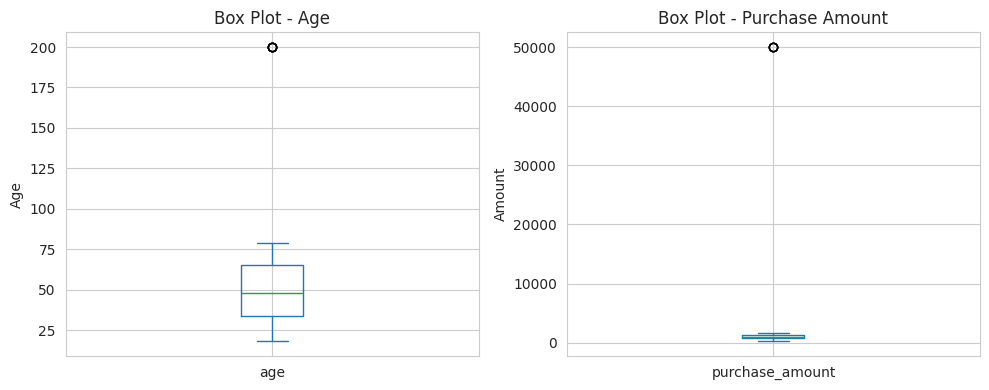

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_customers['age'].plot(kind='box')
plt.title('Box Plot - Age')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
df_customers['purchase_amount'].plot(kind='box')
plt.title('Box Plot - Purchase Amount')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


In [103]:
# TODO: Izračunajte Q1, Q3 i IQR za 'purchase amount' Hint - .quantile(...)

Q1 = df_customers['purchase_amount'].quantile(0.25)
Q3 = df_customers['purchase_amount'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 789.4006416472776, Q3: 1230.5018362915011, IQR: 441.1011946442236


In [104]:
# TODO: Izračunajte donje i gornje granice

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(f"Donja granica: {lower}, Gornja granica: {upper}")

Donja granica: 127.74884968094216, Gornja granica: 1892.1536282578365


In [105]:
# TODO: Izračunajte Z-score za 'purchase amount'

df_customers['purchase_amount_zscore'] = (df_customers['purchase_amount'] - df_customers['purchase_amount'].mean()) / df_customers['purchase_amount'].std()

df_customers.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend,purchase_amount_zscore
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0,False,-0.080313
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0,False,-0.225204
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0,False,-0.105843
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0,True,-0.109450
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0,True,-0.118667


In [106]:
# TODO: Identificirajte outliere (|z| > 3)

df_customers['is_outlier'] = np.abs(df_customers['purchase_amount_zscore']) > 3

df_customers.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend,purchase_amount_zscore,is_outlier
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0,False,-0.080313,False
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0,False,-0.225204,False
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0,False,-0.105843,False
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0,True,-0.109450,False
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0,True,-0.118667,False


In [107]:
# TODO: Uklonite outliere za 'purchase_amount'

df_customers_clean = df_customers[~df_customers['is_outlier']]

df_customers_clean.head()

,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend,purchase_amount_zscore,is_outlier
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0,False,-0.080313,False
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0,False,-0.225204,False
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0,False,-0.105843,False
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0,True,-0.109450,False
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0,True,-0.118667,False


In [113]:
# TODO: Primjenite capping na 'purchase_amount'

df_customers_clean['purchase_amount'] = df_customers_clean['purchase_amount'].clip(lower, upper)

display(df_customers_clean.head())

print(f"\nBroj uklonjenih outliera: {df_customers['is_outlier'].sum()}")

/tmp/ipython-input-1233929763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers_clean['purchase_amount'] = df_customers_clean['purchase_amount'].clip(lower, upper)


,customer_id,name,email,city,registration_date,age,purchase_amount,visits,day_of_week,is_weekend,purchase_amount_zscore,is_outlier
0,1,Customer_1,customer1@email.com,St,2020-01-01,33.0,1433.124163,3,2.0,False,-0.080313,False
1,2,Customer_2,customer2@email.com,Split,2020-01-02,72.0,425.527789,4,3.0,False,-0.225204,False
2,3,Customer_3,customer3@email.com,Čakovac,2020-01-03,NaN,1255.583340,9,4.0,False,-0.105843,False
3,4,Customer_4,customer4@email.com,Zagreb,2020-01-04,NaN,1230.501836,9,5.0,True,-0.109450,False
4,5,Customer_5,customer5@email.com,St,2020-01-05,45.0,1166.407838,9,6.0,True,-0.118667,False



Broj uklonjenih outliera: 4


In [115]:
# TODO: Usporedite srednju vrijednost i medijan prije i poslije

print(f"Srednja vrijednost prije: {df_customers['purchase_amount'].mean()}")
print(f"Medijan prije: {df_customers['purchase_amount'].median()}")

print(f"Srednja vrijednost poslije: {df_customers_clean['purchase_amount'].mean()}")
print(f"Medijan poslije: {df_customers_clean['purchase_amount'].median()}")

Srednja vrijednost prije: 1991.6367645802159
Medijan prije: 1016.1102278087985
Srednja vrijednost poslije: 991.46253050897
Medijan poslije: 1013.3965762014803
